In [1]:
# http://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.html
# https://pypi.org/project/pyramid-arima/
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
# FFT

In [2]:
# https://facebook.github.io/prophet/docs/
# pip install fbprophet
# install -c conda-forge fbprophet

In [3]:
# https://github.com/facebook/prophet/tree/master/examples

The input to Prophet is always a dataframe with two columns: `ds` and `y`. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [4]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')
df.head(2)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590


In [6]:
df.tail(2)

,ds,y
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [7]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [9]:
forecast = m.predict(future)
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041239,8.269693,9.432750,8.041239,8.041239,0.802931,0.802931,0.802931,0.352295,0.352295,0.352295,0.450636,0.450636,0.450636,0.0,0.0,0.0,8.844170
1,2007-12-11,8.039695,7.986142,9.230271,8.039695,8.039695,0.553003,0.553003,0.553003,0.119639,0.119639,0.119639,0.433364,0.433364,0.433364,0.0,0.0,0.0,8.592697


In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206497,7.515821,8.941841
3266,2017-01-16,8.531523,7.873583,9.218478
3267,2017-01-17,8.318930,7.605294,9.020833
3268,2017-01-18,8.151543,7.424690,8.898527
3269,2017-01-19,8.163477,7.429802,8.925311


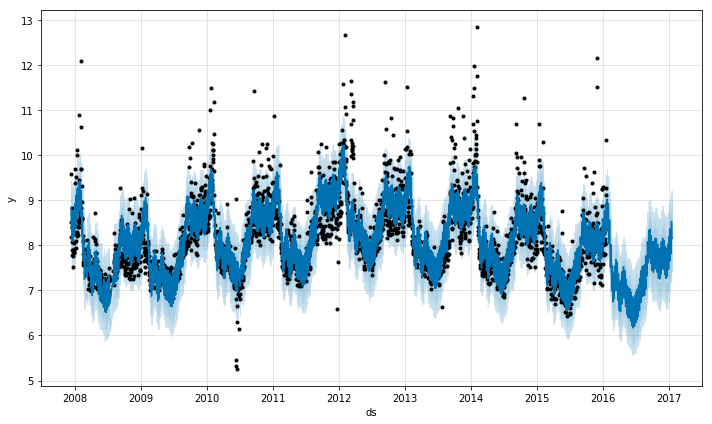

In [11]:
fig1 = m.plot(forecast)

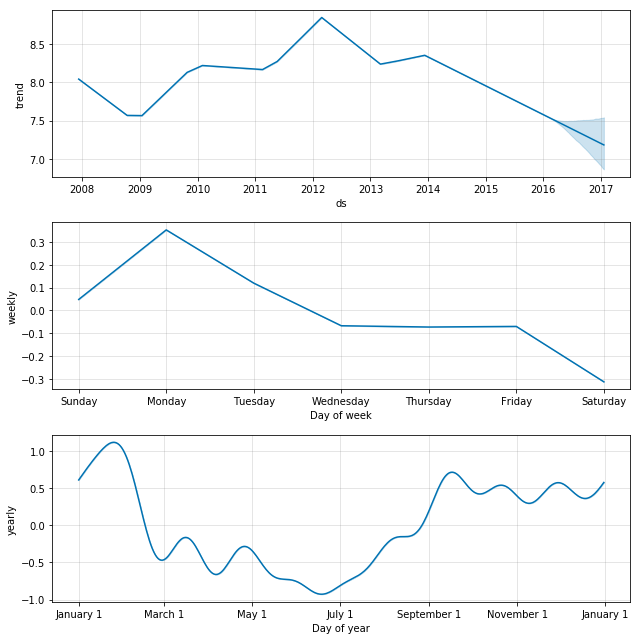

In [12]:
fig2 = m.plot_components(forecast)

In [13]:
df_cv = cross_validation(m, initial='720 days', period='180 days', horizon = '365 days')
df_cv.head(2)

INFO:fbprophet:Making 6 forecasts with cutoffs between 2010-01-30 00:00:00 and 2015-01-29 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-01-31,9.521439,9.079283,9.995421,9.303922,2010-01-30
1,2010-02-01,9.795342,9.271408,10.266621,10.240174,2010-01-30


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head(5)

,horizon,mse,rmse,mae,mape,coverage
1089,36 days,0.480898,0.693468,0.537063,0.061534,0.616114
382,36 days,0.482203,0.694409,0.538725,0.061771,0.611374
33,36 days,0.482553,0.694660,0.538956,0.061922,0.611374
1090,37 days,0.479251,0.692280,0.535541,0.061526,0.616114
1444,37 days,0.478483,0.691725,0.534150,0.061370,0.616114


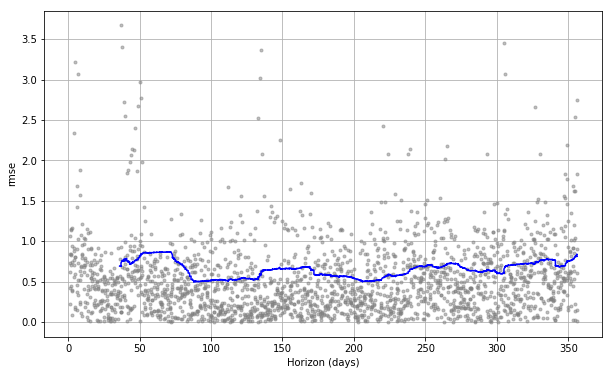

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_R.csv')
df['cap'] = 8.5
df.head(2)

,ds,y,cap
0,2008-01-30,5.976351,8.5
1,2008-01-16,6.049733,8.5


In [ ]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)